In [1]:
import numpy as np
import matplotlib.pyplot as plt

from vortexclean import GPETimeEv as gpev

In [8]:
g = gpev(L = 50, dtcoef = 0.0025,  npoints = 2**7, dim = 2, numRealSteps = 80000, dist = 3, antiV = False)

Total Imag Time:  8.565255880355835


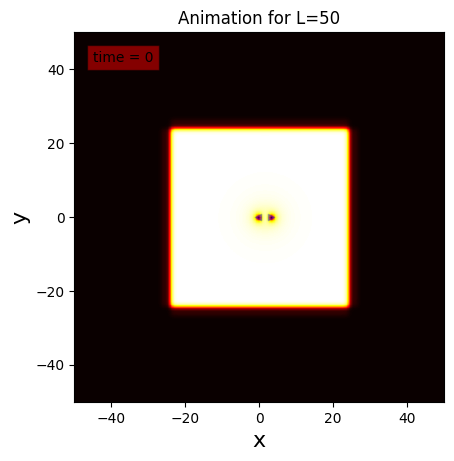

In [9]:
g.animatepsi2d('vortex_inittest2') 

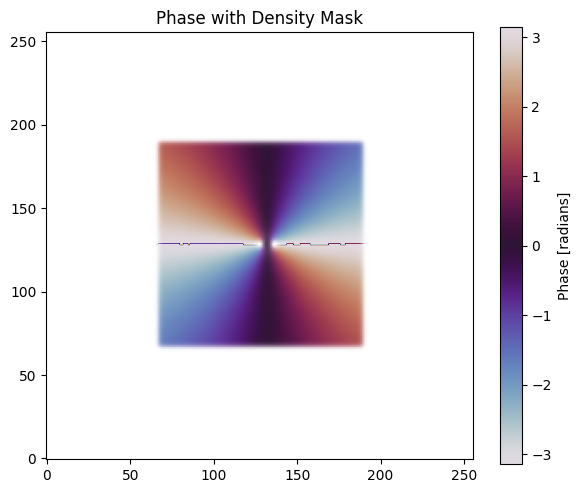

In [24]:
phase = np.angle(g.psi)  # Get the phase field in radians

#plt.figure(figsize=(6, 5))
density = np.abs(g.psi)**2
alpha = density / density.max()  # Normalize to [0,1
plt.figure(figsize=(6,5))
plt.imshow(phase, cmap='twilight', origin='lower', alpha=alpha)
plt.colorbar(label='Phase [radians]')
plt.title("Phase with Density Mask")
plt.tight_layout()
plt.show()


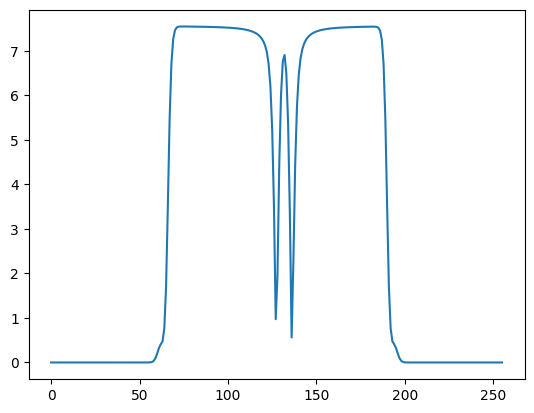

In [67]:
plt.figure() 
plt.plot(np.abs(g.psi[len(g.psi)//2]))

#plt.ylim(0,1)

In [116]:
def detect_vortices(psi, dx, L):
    '''
    Detect vortex positions by checking for 2π phase windings around plaquettes.

    Parameters:
    psi - complex wavefunction (2D array)
    dx - grid spacing

    Returns:
    vortex_positions - list of (x, y) tuples (in index or physical coords)
    '''
    #sideL = len(psi) 
    psi = psi[int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
    plt.figure() 
    plt.imshow(np.abs(psi))
    plt.show() 
    phase = np.angle(psi)
    Ny, Nx = phase.shape
    vortex_positions = []

    for i in range(Ny - 1):
        for j in range(Nx - 1):
            # Get the 2x2 plaquette phase values (counter-clockwise order)
            phi = [phase[i, j], phase[i, j+1], phase[i+1, j+1], phase[i+1, j]]

            # Compute phase differences around the plaquette
            dphi = np.diff(phi + [phi[0]])  # loop around
            dphi = np.mod(dphi + np.pi, 2 * np.pi) - np.pi  # wrap to [-π, π]

            winding_number = np.sum(dphi) / (2 * np.pi)

            if np.abs(winding_number) > 0.7 and -np.abs(psi[i,j]) > -5 and np.abs(psi[i,j])>0.2:  # threshold to count as a vortex
                # Estimate vortex center (you can interpolate better later)
                x = j + 0.5
                y = i + 0.5
                vortex_positions.append((x * dx, y * dx))

    return vortex_positions

In [ ]:
## test with thermal noise and implement boundary conditions 

In [92]:
print(g.L/2/g.dx)

64.0


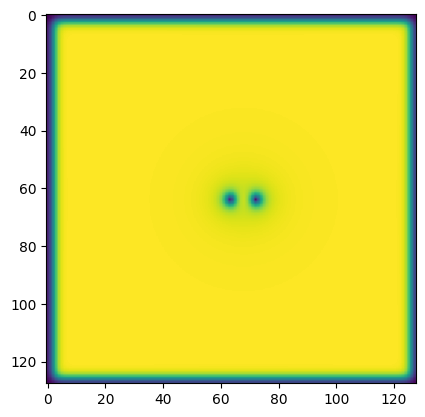

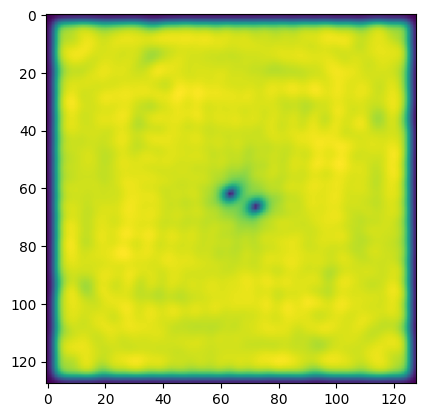

In [117]:
vortex_pos = detect_vortices(g.psi, g.dx, g.L) 
vortex_pos2 = detect_vortices(g.dynpsi, g.dx, g.L) 

In [118]:
print(np.shape(vortex_pos))
print(vortex_pos)

(2, 2)
[(24.8046875, 24.8046875), (28.3203125, 24.8046875)]


In [119]:
print(np.shape(vortex_pos2))
print(vortex_pos2)

(2, 2)
[(24.8046875, 24.0234375), (28.3203125, 25.9765625)]


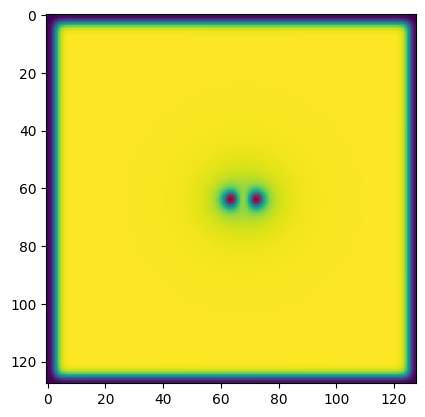

In [120]:
psi = g.psi 
L = g.L 
dx = g.dx
plt.figure() 
plt.imshow(np.abs(psi[int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)])**2)
plt.scatter(vortex_pos[0][0]/dx, vortex_pos[0][1]/dx, alpha = 0.3, color = 'red')
plt.scatter(vortex_pos[1][0]/dx, vortex_pos[1][1]/dx, alpha = 0.3, color = 'red')

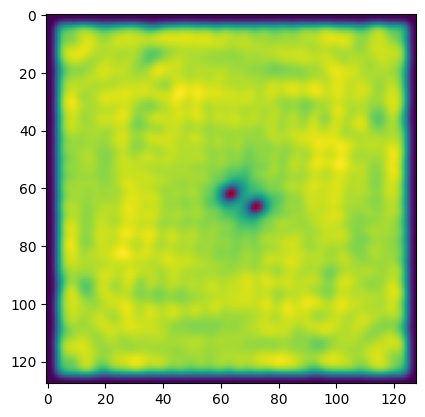

In [122]:
psi = g.dynpsi
plt.figure() 
plt.imshow(np.abs(psi[int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)])**2)
plt.scatter(vortex_pos2[0][0]/g.dx, vortex_pos2[0][1]/g.dx, alpha = 0.3, color = 'red')
plt.scatter(vortex_pos2[1][0]/g.dx, vortex_pos2[1][1]/g.dx, alpha = 0.3, color = 'red')
